# Time series forecasting approach for anomaly detection
# using Prophet




### AUTHOR: AVINASH BAGUL

#### INSTALLING PROPHET PACKAGE

In [ ]:
!pip install pystan
!pip install fbprophet

#### IMPORTING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
import time

#### READING THE DATASET

In [ ]:
df1 = pd.read_csv("iqr_benchmark.csv", index_col=['Time_stamp'], parse_dates=['Time_stamp'])
df1

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
Time_stamp,,,,,,,,,,,,,
2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


SEPARATING DATA FOR ONE SENSE-BOX

In [ ]:
df1 = df1[df1['boxName']=='Bernem']
df = df1

In [ ]:
df = df.dropna()
df.shape

(162173, 13)

PLOTTING THE DATASET FEATURES

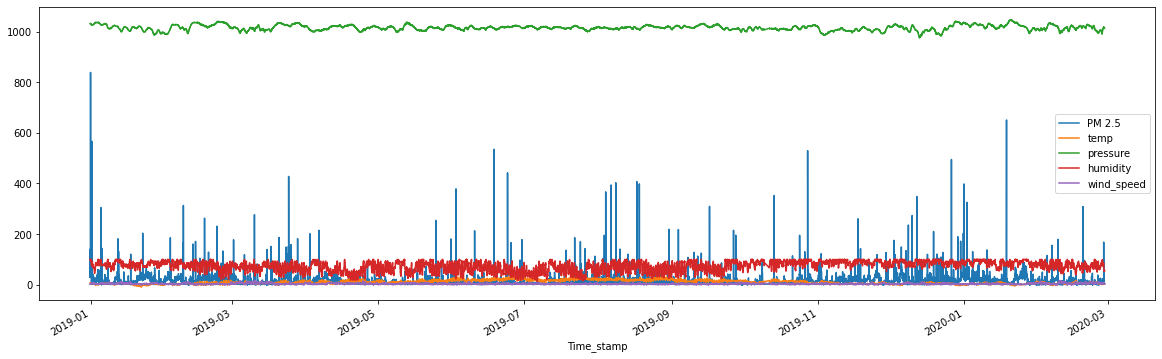

In [ ]:
frame = df
frame.plot(figsize=(20,6))

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

CREATING A MODEL 

In [ ]:
model = Prophet()

SETTING TIMESTAMP AS INDEX

In [ ]:
frame['Time_stamp'] = frame.index

THE TIME-STAMP COLUMN AND PM2.5 COLUMN IS RENAMED, ESSENTIAL STEP FOR PROPHET

In [ ]:
frame.rename(columns={'Time_stamp':'ds','PM 2.5':'y'},inplace=True)

In [ ]:
frame = frame[1:]

FIT THE MODEL

In [ ]:
model.fit(frame)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future_dates = model.make_future_dataframe(periods=365)
future_dates.shape

(162537, 1)

FIT THE MODEL

In [ ]:
start = time.time()

prediction = model.predict(future_dates)
prediction.head(10)

print('time taken by algorithm is: ', time.time()-start)

time taken by algorithm is:  78.06184911727905


PREDICTIONS MADE BY PROPHET MODEL

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-31 18:35:01,21.690107,5.521898,38.235588,21.690107,21.690107,-0.081705,-0.081705,-0.081705,-0.360413,-0.360413,-0.360413,0.278708,0.278708,0.278708,0.0,0.0,0.0,21.608402
1,2018-12-31 18:39:09,21.687630,5.371897,37.444112,21.687630,21.687630,-0.076506,-0.076506,-0.076506,-0.360881,-0.360881,-0.360881,0.284375,0.284375,0.284375,0.0,0.0,0.0,21.611124
2,2018-12-31 18:43:17,21.685154,5.387780,39.055017,21.685154,21.685154,-0.072677,-0.072677,-0.072677,-0.362701,-0.362701,-0.362701,0.290023,0.290023,0.290023,0.0,0.0,0.0,21.612477
3,2018-12-31 18:47:24,21.682688,4.724572,39.370919,21.682688,21.682688,-0.070103,-0.070103,-0.070103,-0.365733,-0.365733,-0.365733,0.295630,0.295630,0.295630,0.0,0.0,0.0,21.612584
4,2018-12-31 18:51:32,21.680211,5.488751,38.781315,21.680211,21.680211,-0.068634,-0.068634,-0.068634,-0.369874,-0.369874,-0.369874,0.301240,0.301240,0.301240,0.0,0.0,0.0,21.611577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162532,2021-02-23 18:27:11,-107.500953,-1201.446260,947.754365,-1202.295272,953.097027,-0.206696,-0.206696,-0.206696,-0.363638,-0.363638,-0.363638,0.156942,0.156942,0.156942,0.0,0.0,0.0,-107.707650
162533,2021-02-24 18:27:11,-107.803557,-1208.471082,957.748840,-1206.281202,956.254840,-0.874008,-0.874008,-0.874008,-0.363638,-0.363638,-0.363638,-0.510370,-0.510370,-0.510370,0.0,0.0,0.0,-108.677565
162534,2021-02-25 18:27:11,-108.106161,-1212.900150,971.617869,-1211.072569,959.272063,0.924226,0.924226,0.924226,-0.363638,-0.363638,-0.363638,1.287863,1.287863,1.287863,0.0,0.0,0.0,-107.181935
162535,2021-02-26 18:27:11,-108.408765,-1218.165667,970.446162,-1215.696652,963.912302,-0.311898,-0.311898,-0.311898,-0.363638,-0.363638,-0.363638,0.051740,0.051740,0.051740,0.0,0.0,0.0,-108.720663


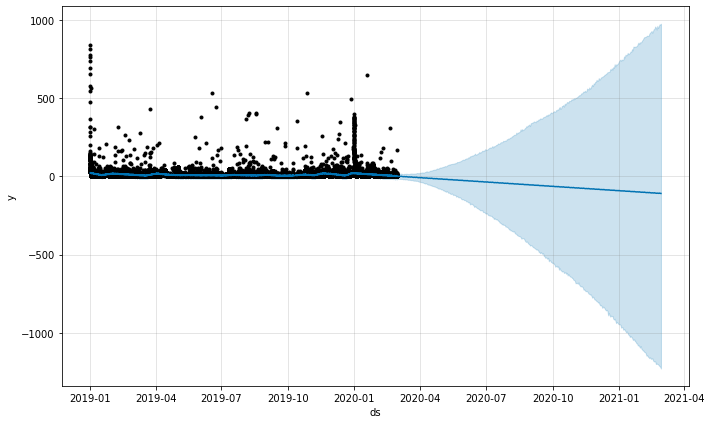

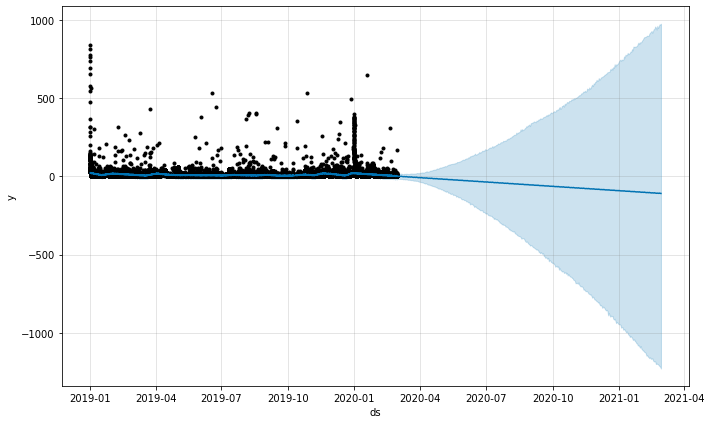

In [ ]:
model.plot(prediction)

TRENDS

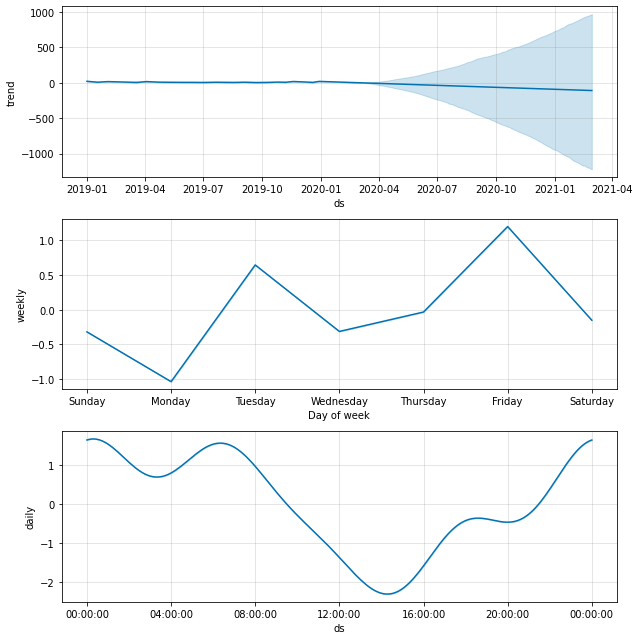

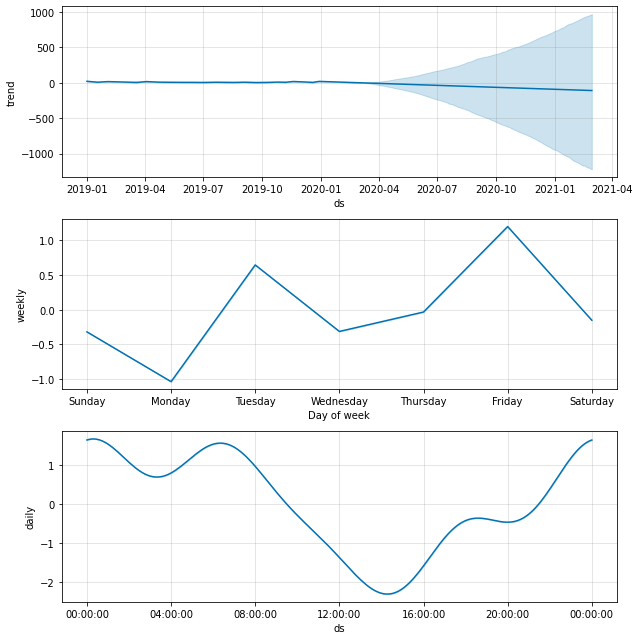

In [ ]:
model.plot_components(prediction)

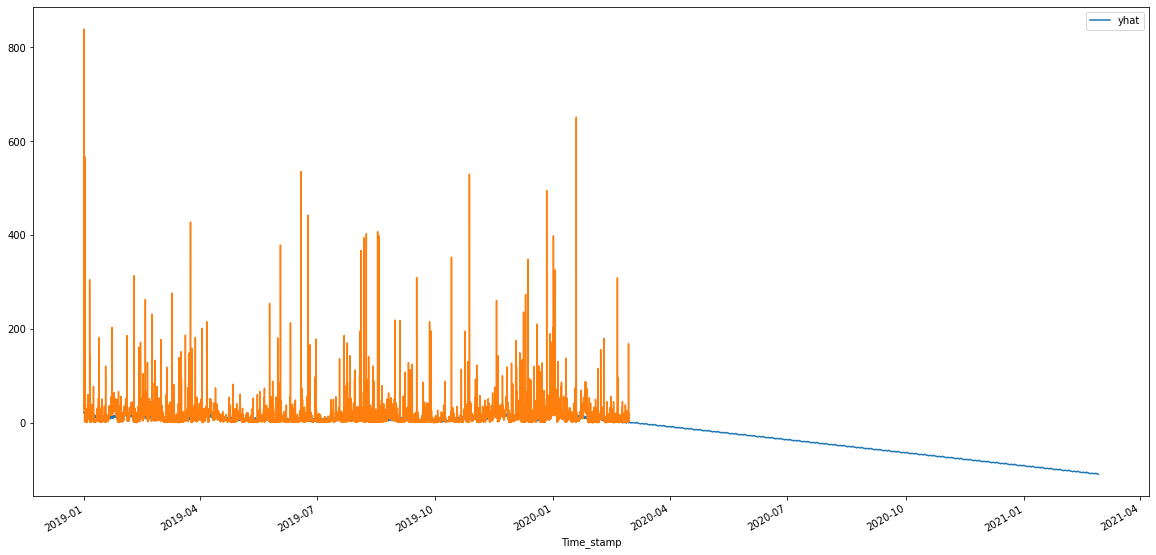

In [ ]:
pred = prediction[['ds','yhat']]
pred = pred.set_index('ds')
pred.plot(figsize=(20,10))
frame['y'].plot()

CALCULATING ROOT MEAN SQUARED ERROR

In [ ]:
from math import sqrt
ll = []

actual = frame['y'].values
pred = prediction['yhat'].values
pred = pred[:162172]
print(len(actual), len(pred))
error = mean_squared_error(actual, pred)
print('Test MSE: %.3f' % error)
rmse = sqrt(mean_squared_error(actual, pred))
print('Test RMSE: %f'% rmse)

for i in range(0,162172):

    z = actual[i] - pred[i]

    if z > 11:
        ll.append('abnormal')
    else:
        ll.append('normal')



162172 162172
Test MSE: 165.078
Test RMSE: 12.848251


### EVALUATION METRICS:
CALCULATING THE ACCURACY, PRECISION, RECALL AND F1 SCORE

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

obt_label = ll
gold_label = df1['label']
testy = obt_label
yhat_classes = gold_label[0:162172]


accuracy = accuracy_score(testy, yhat_classes) # accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % accuracy)

precision = precision_score(testy, yhat_classes, pos_label = 'abnormal') # precision tp / (tp + fp)
print('Precision: %f' % precision)

recall = recall_score(testy, yhat_classes, pos_label = 'abnormal') # recall: tp / (tp + fn)
print('Recall: %f' % recall)

f1 = f1_score(testy, yhat_classes, pos_label = 'abnormal') # f1: 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % f1)

cm = confusion_matrix(testy, yhat_classes)
print('Confusion matrix: \n', cm)


Accuracy: 0.921004
Precision: 0.638356
Recall: 0.368704
F1 score: 0.467429
Confusion matrix: 
 [[  5622   9626]
 [  3185 143739]]
